In [1]:
import os
import torch
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

DATASET_DIR = r"C:\Users\Hp\Desktop\Project\datasetViT"  # path to your Roboflow dataset
BATCH_SIZE = 16          # RTX 3050 safe value

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_dataset = datasets.ImageFolder(
    os.path.join(DATASET_DIR, "train"),
    transform=transform
)

val_dataset = datasets.ImageFolder(
    os.path.join(DATASET_DIR, "valid"),
    transform=transform
)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE, shuffle=False)

class_names = train_dataset.classes
num_classes = len(class_names)

print("Classes:", class_names)


Classes: ['Biodegradable', 'Hazardous', 'NonBiodegradable']


In [3]:
from transformers import ViTForImageClassification
import torch

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=3,
    ignore_mismatched_sizes=True
)

model.to(device)

c:\Users\Hp\Desktop\Project\edge_ai\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


ViTForImageClassification(
  (vit): ViTModel(
    (embeddings): ViTEmbeddings(
      (patch_embeddings): ViTPatchEmbeddings(
        (projection): Conv2d(3, 768, kernel_size=(16, 16), stride=(16, 16))
      )
      (dropout): Dropout(p=0.0, inplace=False)
    )
    (encoder): ViTEncoder(
      (layer): ModuleList(
        (0-11): 12 x ViTLayer(
          (attention): ViTAttention(
            (attention): ViTSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
            )
            (output): ViTSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.0, inplace=False)
            )
          )
          (intermediate): ViTIntermediate(
            (dense): Linear(in_features=768, out_features=3072, bias=True)
            (intermed

In [4]:
import os
from torchvision import datasets, transforms

DATASET_DIR = r"C:\Users\Hp\Desktop\Project\datasetViT"   # <-- must point to Roboflow export root

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# TRAIN dataset
train_dataset = datasets.ImageFolder(
    os.path.join(DATASET_DIR, "train"),
    transform=transform
)

# VALIDATION dataset
val_dataset = datasets.ImageFolder(
    os.path.join(DATASET_DIR, "valid"),
    transform=transform
)

num_classes = len(train_dataset.classes)

print("Classes:", train_dataset.classes)
print("Number of classes:", num_classes)


Classes: ['Biodegradable', 'Hazardous', 'NonBiodegradable']
Number of classes: 3


In [5]:
from torch.utils.data import DataLoader

BATCH_SIZE = 16   # reduce to 8 if CUDA OOM

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)


In [6]:
import torch.nn as nn
from torch.optim import AdamW

# Loss function
criterion = nn.CrossEntropyLoss()

# Optimizer (correct for ViT fine-tuning)
optimizer = AdamW(
    model.parameters(),
    lr=2e-5,
    weight_decay=1e-4
)

print("Optimizer and loss initialized")


Optimizer and loss initialized


In [7]:
# -------- Imports --------
import os
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
from transformers import ViTForImageClassification
from torch.optim import AdamW

# -------- Device --------
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# -------- Dataset --------
DATASET_DIR = r"C:\Users\Hp\Desktop\Project\datasetViT"

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_dataset = datasets.ImageFolder(os.path.join(DATASET_DIR, "train"), transform=transform)
val_dataset = datasets.ImageFolder(os.path.join(DATASET_DIR, "valid"), transform=transform)

num_classes = len(train_dataset.classes)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# -------- Model --------
model = ViTForImageClassification.from_pretrained(
    "google/vit-base-patch16-224",
    num_labels=num_classes,
    ignore_mismatched_sizes=True
).to(device)

# -------- Loss & Optimizer --------
criterion = nn.CrossEntropyLoss()
optimizer = AdamW(model.parameters(), lr=2e-5, weight_decay=1e-4)

print("Setup complete. Ready to train.")


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224 and are newly initialized because the shapes did not match:
- classifier.bias: found shape torch.Size([1000]) in the checkpoint and torch.Size([3]) in the model instantiated
- classifier.weight: found shape torch.Size([1000, 768]) in the checkpoint and torch.Size([3, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Setup complete. Ready to train.


In [8]:
import os
print(os.getcwd())

c:\Users\Hp\Desktop\Project


In [9]:
import os

print("Dataset exists:", os.path.exists(DATASET_DIR))
print("Train exists:", os.path.exists(os.path.join(DATASET_DIR, "train")))
print("Valid exists:", os.path.exists(os.path.join(DATASET_DIR, "valid")))

print("Train subfolders:", os.listdir(os.path.join(DATASET_DIR, "train")))


Dataset exists: True
Train exists: True
Valid exists: True
Train subfolders: ['Biodegradable', 'Hazardous', 'NonBiodegradable']


In [10]:
from torchvision import datasets, transforms

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.RandomHorizontalFlip(),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

train_dataset = datasets.ImageFolder(
    os.path.join(DATASET_DIR, "train"),
    transform=transform
)

val_dataset = datasets.ImageFolder(
    os.path.join(DATASET_DIR, "valid"),
    transform=transform
)

num_classes = len(train_dataset.classes)

print("Classes:", train_dataset.classes)
print("Number of classes:", num_classes)


Classes: ['Biodegradable', 'Hazardous', 'NonBiodegradable']
Number of classes: 3


In [11]:
from torch.utils.data import DataLoader

BATCH_SIZE = 16   # if CUDA OOM → set to 8

train_loader = DataLoader(
    train_dataset,
    batch_size=BATCH_SIZE,
    shuffle=True,
    num_workers=2
)

val_loader = DataLoader(
    val_dataset,
    batch_size=BATCH_SIZE,
    shuffle=False,
    num_workers=2
)

print("DataLoaders ready")


DataLoaders ready


In [12]:
import torch.nn as nn
from torch.optim import AdamW

criterion = nn.CrossEntropyLoss()

optimizer = AdamW(
    model.parameters(),
    lr=2e-5,          # correct for ViT
    weight_decay=1e-4
)

print("Loss and optimizer ready")


Loss and optimizer ready


In [13]:
for param in model.vit.parameters():
    param.requires_grad = False

print("ViT backbone frozen")


ViT backbone frozen


In [14]:
from tqdm import tqdm

EPOCHS = 30

for epoch in range(EPOCHS):
    print(f"\nEpoch {epoch+1}/{EPOCHS}")

    # ---------- TRAIN ----------
    model.train()
    running_loss = 0.0

    for images, labels in tqdm(train_loader, desc="Training"):
        images = images.to(device)
        labels = labels.to(device)

        optimizer.zero_grad()

        outputs = model(images).logits
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    train_loss = running_loss / len(train_loader)

    # ---------- VALIDATE ----------
    model.eval()
    correct = 0
    total = 0

    with torch.no_grad():
        for images, labels in tqdm(val_loader, desc="Validation"):
            images = images.to(device)
            labels = labels.to(device)

            outputs = model(images).logits
            preds = torch.argmax(outputs, dim=1)

            correct += (preds == labels).sum().item()
            total += labels.size(0)

    val_accuracy = correct / total

    print(f"Train Loss: {train_loss:.4f}")
    print(f"Validation Accuracy: {val_accuracy:.4f}")



Epoch 1/30


Validation: 100%|██████████| 95/95 [00:23<00:00,  3.99it/s]


Train Loss: 1.0179
Validation Accuracy: 0.6548

Epoch 2/30


Validation: 100%|██████████| 95/95 [00:24<00:00,  3.95it/s]


Train Loss: 0.7225
Validation Accuracy: 0.8287

Epoch 3/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


Train Loss: 0.5541
Validation Accuracy: 0.8770

Epoch 4/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


Train Loss: 0.4501
Validation Accuracy: 0.9021

Epoch 5/30


Validation: 100%|██████████| 95/95 [00:24<00:00,  3.84it/s]


Train Loss: 0.3800
Validation Accuracy: 0.9167

Epoch 6/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.60it/s]


Train Loss: 0.3296
Validation Accuracy: 0.9279

Epoch 7/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.57it/s]


Train Loss: 0.2931
Validation Accuracy: 0.9325

Epoch 8/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.55it/s]


Train Loss: 0.2655
Validation Accuracy: 0.9392

Epoch 9/30


Validation: 100%|██████████| 95/95 [00:27<00:00,  3.50it/s]


Train Loss: 0.2438
Validation Accuracy: 0.9398

Epoch 10/30


Validation: 100%|██████████| 95/95 [00:25<00:00,  3.69it/s]


Train Loss: 0.2249
Validation Accuracy: 0.9431

Epoch 11/30


Validation: 100%|██████████| 95/95 [00:25<00:00,  3.77it/s]


Train Loss: 0.2103
Validation Accuracy: 0.9464

Epoch 12/30


Validation: 100%|██████████| 95/95 [00:25<00:00,  3.75it/s]


Train Loss: 0.1974
Validation Accuracy: 0.9438

Epoch 13/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.59it/s]


Train Loss: 0.1880
Validation Accuracy: 0.9444

Epoch 14/30


Validation: 100%|██████████| 95/95 [00:25<00:00,  3.69it/s]


Train Loss: 0.1788
Validation Accuracy: 0.9464

Epoch 15/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.55it/s]


Train Loss: 0.1694
Validation Accuracy: 0.9517

Epoch 16/30


Validation: 100%|██████████| 95/95 [00:25<00:00,  3.67it/s]


Train Loss: 0.1633
Validation Accuracy: 0.9491

Epoch 17/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.65it/s]


Train Loss: 0.1567
Validation Accuracy: 0.9504

Epoch 18/30


Validation: 100%|██████████| 95/95 [00:25<00:00,  3.70it/s]


Train Loss: 0.1516
Validation Accuracy: 0.9484

Epoch 19/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.61it/s]


Train Loss: 0.1467
Validation Accuracy: 0.9504

Epoch 20/30


Validation: 100%|██████████| 95/95 [00:24<00:00,  3.84it/s]


Train Loss: 0.1414
Validation Accuracy: 0.9517

Epoch 21/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.58it/s]


Train Loss: 0.1373
Validation Accuracy: 0.9537

Epoch 22/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.60it/s]


Train Loss: 0.1333
Validation Accuracy: 0.9517

Epoch 23/30


Validation: 100%|██████████| 95/95 [00:25<00:00,  3.66it/s]


Train Loss: 0.1311
Validation Accuracy: 0.9530

Epoch 24/30


Validation: 100%|██████████| 95/95 [00:25<00:00,  3.67it/s]


Train Loss: 0.1271
Validation Accuracy: 0.9544

Epoch 25/30


Validation: 100%|██████████| 95/95 [00:24<00:00,  3.86it/s]


Train Loss: 0.1231
Validation Accuracy: 0.9557

Epoch 26/30


Validation: 100%|██████████| 95/95 [00:24<00:00,  3.83it/s]


Train Loss: 0.1217
Validation Accuracy: 0.9530

Epoch 27/30


Validation: 100%|██████████| 95/95 [00:25<00:00,  3.78it/s]


Train Loss: 0.1192
Validation Accuracy: 0.9557

Epoch 28/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.63it/s]


Train Loss: 0.1168
Validation Accuracy: 0.9570

Epoch 29/30


Validation: 100%|██████████| 95/95 [00:26<00:00,  3.62it/s]


Train Loss: 0.1144
Validation Accuracy: 0.9570

Epoch 30/30


Validation: 100%|██████████| 95/95 [00:24<00:00,  3.84it/s]

Train Loss: 0.1126
Validation Accuracy: 0.9577


In [15]:
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images).logits
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


In [16]:
cm = confusion_matrix(all_labels, all_preds)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[359   3  15]
 [  2 425  19]
 [ 11  14 664]]


In [17]:
report = classification_report(
    all_labels,
    all_preds,
    target_names=train_dataset.classes,
    digits=4
)

print("Classification Report:")
print(report)


Classification Report:
                  precision    recall  f1-score   support

   Biodegradable     0.9651    0.9523    0.9586       377
       Hazardous     0.9615    0.9529    0.9572       446
NonBiodegradable     0.9513    0.9637    0.9575       689

        accuracy                         0.9577      1512
       macro avg     0.9593    0.9563    0.9578      1512
    weighted avg     0.9577    0.9577    0.9577      1512



In [18]:
import torch

model.eval()

dummy_input = torch.randn(1, 3, 224, 224).to(device)

onnx_path = "vit_waste_classifier.onnx"

torch.onnx.export(
    model,
    dummy_input,
    onnx_path,
    input_names=["input"],
    output_names=["logits"],
    dynamic_axes={
        "input": {0: "batch_size"},
        "logits": {0: "batch_size"}
    },
    opset_version=14
)

print(f"ONNX model saved at: {onnx_path}")

c:\Users\Hp\Desktop\Project\edge_ai\Lib\site-packages\transformers\models\vit\modeling_vit.py:155: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if num_channels != self.num_channels:
c:\Users\Hp\Desktop\Project\edge_ai\Lib\site-packages\transformers\models\vit\modeling_vit.py:161: TracerWarning: Converting a tensor to a Python boolean might cause the trace to be incorrect. We can't record the data flow of Python values, so this value will be treated as a constant in the future. This means that the trace might not generalize to other inputs!
  if height != self.image_size[0] or width != self.image_size[1]:


ONNX model saved at: vit_waste_classifier.onnx


In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np

vit_model = model   # assuming `model` is your trained ViT
vit_model.eval()

all_preds = []
all_labels = []

with torch.no_grad():
    for images, labels in val_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = vit_model(images).logits
        preds = torch.argmax(outputs, dim=1)

        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())


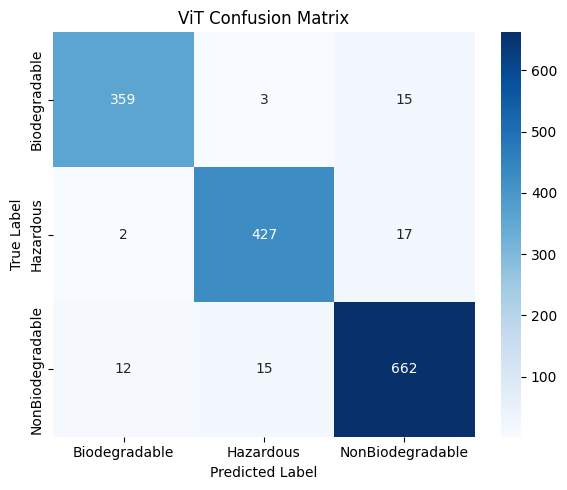

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(all_labels, all_preds)
class_names = train_dataset.classes

plt.figure(figsize=(6, 5))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=class_names,
    yticklabels=class_names
)

plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("ViT Confusion Matrix")
plt.tight_layout()
plt.show()
